Problem 1

In [4]:
from torchvision import models
import torch, torchvision
from PIL import Image
import requests
from io import BytesIO
from torchvision import transforms
from skimage import io,transform
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [5]:
model = torchvision.models.resnet50(pretrained=True)
model.eval()
S = 255

In [6]:
transform = transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(244),
                               transforms.ToTensor(),
                               transforms.Normalize(
                                   mean = [0.485, 0.456, 0.406],
                                   std = [0.229, 0.224, 0.224]
                               )
])

In [7]:
with open('imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]
print("Number of classes: {}".format(len(classes)))

Number of classes: 1000


In [8]:
x = np.array([["https://media.wired.com/photos/5c6750d23e8add2cdb91724f/125:94/w_2393,h_1800,c_limit/shark-551025353.jpg"],
             ["https://d.newsweek.com/en/full/1920609/great-white-shark.jpg"],
             ["https://cdn.britannica.com/07/5207-050-5BC9F251/Gray-wolf.jpg"],
             ["https://chicago.cbslocal.com/wp-content/uploads/sites/15116062/2015/02/158275387.jpg"],
             ["https://vetstreet-brightspot.s3.amazonaws.com/92/94d720a7fc11e0a0d50050568d634f/file/Saint-bernard-3-645mk062811.jpg"],
             ["https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F07%2F14%2Fsaint-bernard-puppy-sitting-1137535085-2000.jpg"],
             ["https://i.natgeofe.com/n/75c97a1f-3303-4dc8-bc93-9c4af9285ee2/3224350_3x2.jpg"],
             ["https://www.mangelsen.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/1/5/1561wm.jpg"],
             ["https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg"],
             ["https://images.hindustantimes.com/img/2021/07/29/1600x900/waldemar-brandt-zQsCISvBY2E-unsplash_1627533052461_1627533078303.jpg"]])


Image 1

Picture of a Great White Shark


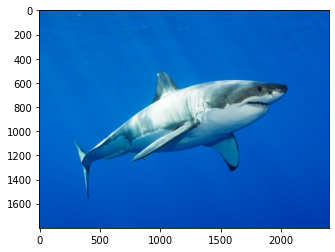

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[('great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
  91.5804214477539)]

In [9]:
print("Picture of a Great White Shark")
response = requests.get(x.item(0))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img1 = transform(img)
j=img1
batch1 = torch.unsqueeze(img1,0)
Answer1 = model(batch1)
_, indices = torch.sort(Answer1,descending = True)
precentage = torch.nn.functional.softmax(Answer1,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 2

Picture of a Great White Shark


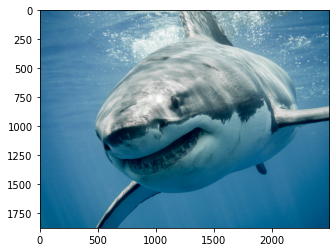

[('great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
  92.37869262695312)]

In [10]:
print("Picture of a Great White Shark")
response = requests.get(x.item(1))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img2 = transform(img)
batch2 = torch.unsqueeze(img2,0)
Answer2 = model(batch2)
_, indices = torch.sort(Answer2,descending = True)
precentage = torch.nn.functional.softmax(Answer2,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 3

Picture of a Wolf


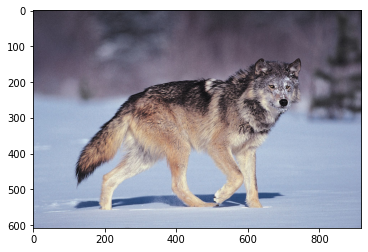

[('timber wolf, grey wolf, gray wolf, Canis lupus', 88.68226623535156)]

In [11]:
print("Picture of a Wolf")
response3 = requests.get(x.item(2))
img3 = Image.open(BytesIO(response3.content))
img3.resize((256,256))
imgplot = plt.imshow(img3)
plt.show()
img3 = transform(img3)
batch3 = torch.unsqueeze(img3,0)
Answer3 = model(batch3)
_, indices = torch.sort(Answer3,descending = True)
precentage = torch.nn.functional.softmax(Answer3,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 4

Picture of a Wolf


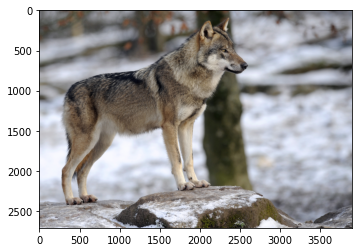

[('timber wolf, grey wolf, gray wolf, Canis lupus', 90.46613311767578)]

In [12]:
print("Picture of a Wolf")
response = requests.get(x.item(3))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img4 = transform(img)
j  = torch.stack([j,img4])
batch4 = torch.unsqueeze(img4,0)
Answer4 = model(batch4)
_, indices = torch.sort(Answer4,descending = True)
precentage = torch.nn.functional.softmax(Answer4,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 5

Picture of a Saint Bernard


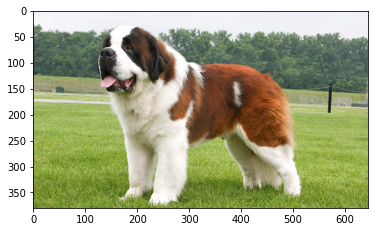

[('Saint Bernard, St Bernard', 99.69489288330078)]

In [13]:
print("Picture of a Saint Bernard")
response = requests.get(x.item(4))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img5 = transform(img)
batch5 = torch.unsqueeze(img5,0)
Answer5 = model(batch5)
_, indices = torch.sort(Answer5,descending = True)
precentage = torch.nn.functional.softmax(Answer5,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 6

Picture of a Saint Bernard


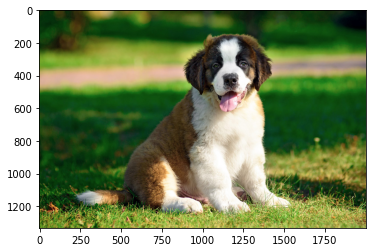

[('Saint Bernard, St Bernard', 98.8149185180664)]

In [14]:
print("Picture of a Saint Bernard")
response = requests.get(x.item(5))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img6 = transform(img)
batch6 = torch.unsqueeze(img6,0)
Answer6 = model(batch6)
_, indices = torch.sort(Answer6,descending = True)
precentage = torch.nn.functional.softmax(Answer6,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 7

Picture of an Artic Fox


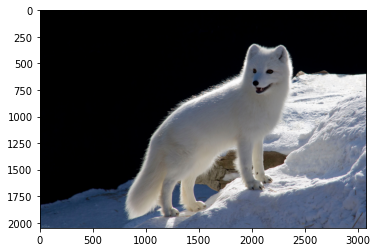

[('Arctic fox, white fox, Alopex lagopus', 99.69449615478516)]

In [15]:
print("Picture of an Artic Fox")
response = requests.get(x.item(6))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img7 = transform(img)
batch7 = torch.unsqueeze(img7,0)
Answer7 = model(batch7)
_, indices = torch.sort(Answer7,descending = True)
precentage = torch.nn.functional.softmax(Answer7,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 8

Picture of an Artic Fox


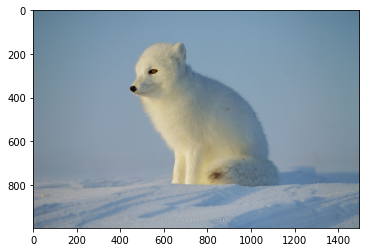

[('Arctic fox, white fox, Alopex lagopus', 98.83041381835938)]

In [16]:
print("Picture of an Artic Fox")
response = requests.get(x.item(7))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img8 = transform(img)
batch8 = torch.unsqueeze(img8,0)
Answer8 = model(batch8)
_, indices = torch.sort(Answer8,descending = True)
precentage = torch.nn.functional.softmax(Answer8,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 9

Picture of a Tiger


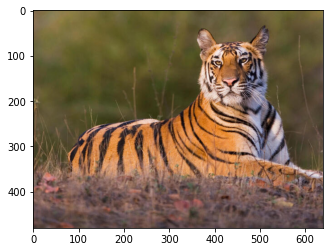

[('tiger, Panthera tigris', 76.78153228759766)]

In [17]:
print("Picture of a Tiger")
response = requests.get(x.item(8))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img9 = transform(img)
batch9 = torch.unsqueeze(img9,0)
Answer9 = model(batch9)
_, indices = torch.sort(Answer9,descending = True)
precentage = torch.nn.functional.softmax(Answer9,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Image 10

Picture of a Tiger


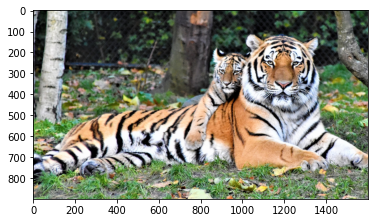

[('tiger, Panthera tigris', 76.78153228759766)]

In [18]:
print("Picture of a Tiger")
response = requests.get(x.item(9))
img = Image.open(BytesIO(response.content))
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img10 = transform(img)
batch10 = torch.unsqueeze(img10,0)
Answer10 = model(batch10)
_, indices = torch.sort(Answer10,descending = True)
precentage = torch.nn.functional.softmax(Answer9,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:1]]

Problem 2

In [19]:
from torchvision.models.resnet import ResNet, BasicBlock
import torchvision
from torchvision import datasets, models, transforms
from torchvision.datasets import MNIST
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import time
from torch import nn, optim
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from torch.utils.data import DataLoader
from torchvision import models
import torch, torchvision
from PIL import Image
import requests
from io import BytesIO
from torchvision import transforms
from skimage import io,transform
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [20]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')
epochs = 14
train_batch_size = 60 
val_batch_size = 60

In [21]:
mnist = MNIST(download=True, train=True, root=".").train_data.float()
data_transform = Compose([transforms.Grayscale(num_output_channels=3),Resize((224, 224)),ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])
train_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(MNIST(download=False, root=".", transform=data_transform, train=False),
                            batch_size=val_batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [22]:
model = models.resnet18(pretrained=True)
num_classes = 10
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [23]:
start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    model.cuda()

In [24]:
loss_function = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
losses = []
batches = len(train_loader)
val_batches = len(val_loader)

In [25]:
for epoch in range(epochs):
    total_loss = 0
    progress = tqdm(enumerate(train_loader), desc="Loss: ", total=batches)

    #Train
    model.train()
    
    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)
        model.zero_grad()
        outputs = model(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step()
        current_loss = loss.item()
        total_loss += current_loss
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))
        
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # Val
    model.eval()
    val_losses = 0
    precision, recall, f1, accuracy = [], [], [], []
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            X, y = data[0].to(device), data[1].to(device)

            outputs = model(X) # this get's the prediction from the network

            val_losses += loss_function(outputs, y)

            predicted_classes = torch.max(outputs, 1)[1] # get class from network's prediction          
    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {val_losses/val_batches}")

Loss:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/5, training loss: 0.05940855991511489, validation loss: 0.0185974333435297


Loss:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2/5, training loss: 0.0153662638329115, validation loss: 0.01531575620174408


Loss:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3/5, training loss: 0.008993724597232359, validation loss: 0.013375801034271717


Loss:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4/5, training loss: 0.004948684474195033, validation loss: 0.010953633114695549


Loss:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5/5, training loss: 0.0042214776235177855, validation loss: 0.012106400914490223


In [26]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Picture of a 8


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


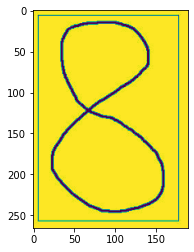

[('8', 99.73350524902344),
 ('3', 0.1306886374950409),
 ('0', 0.049345601350069046),
 ('1', 0.0360378623008728),
 ('2', 0.0324542298913002),
 ('6', 0.010661696083843708),
 ('4', 0.0025917089078575373),
 ('5', 0.002282716566696763),
 ('9', 0.0017329578986391425),
 ('7', 0.000707772618625313)]

In [27]:
mnist = MNIST(download=True, train=True, root=".").train_data.float()
response = requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlRSw39IwGV3-RK_tPq-egyRY8XSkJL5xPPg&usqp=CAU")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
print("Picture of a 8")
imgplot = plt.imshow(img)
plt.show()
img1 = data_transform(img)
batch1 = torch.unsqueeze(img1,0)
batch1= batch1.cuda()
Answer1 = model(batch1)
_, indices = torch.sort(Answer1,descending = True)
precentage = torch.nn.functional.softmax(Answer1,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 3


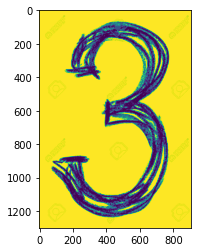

[('8', 84.57765197753906),
 ('3', 15.27750015258789),
 ('5', 0.06712721288204193),
 ('6', 0.04116552695631981),
 ('2', 0.021720394492149353),
 ('0', 0.01199209876358509),
 ('4', 0.0016328587662428617),
 ('1', 0.0008823266252875328),
 ('9', 0.00017327825480606407),
 ('7', 0.00015440743300132453)]

In [28]:
print("Picture of a 3")
response = requests.get("https://previews.123rf.com/images/aroas/aroas1704/aroas170400051/79321944-handwritten-sketch-black-number-3-on-white-background.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img2 = data_transform(img)
batch2 = torch.unsqueeze(img2,0)
batch2= batch2.cuda()
Answer2 = model(batch2)
_, indices = torch.sort(Answer2,descending = True)
precentage = torch.nn.functional.softmax(Answer2,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 0


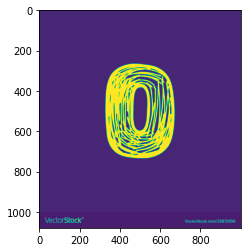

[('0', 87.71875762939453),
 ('8', 7.282942771911621),
 ('9', 3.1983346939086914),
 ('6', 1.6892354488372803),
 ('5', 0.07664754241704941),
 ('2', 0.017802264541387558),
 ('1', 0.01306425966322422),
 ('4', 0.0021428714971989393),
 ('3', 0.0005617231363430619),
 ('7', 0.0005127342883497477)]

In [29]:
print("Picture of a 0")
response3 = requests.get("https://cdn2.vectorstock.com/i/1000x1000/05/56/number-zero-hand-drawn-chalk-on-a-blackboard-vector-32870556.jpg")
img3 = Image.open(BytesIO(response3.content)).convert('L')
img3.resize((256,256))
imgplot = plt.imshow(img3)
plt.show()
img3 = data_transform(img3)
batch3 = torch.unsqueeze(img3,0)
batch3= batch3.cuda()
Answer3 = model(batch3)
_, indices = torch.sort(Answer3,descending = True)
precentage = torch.nn.functional.softmax(Answer3,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 6


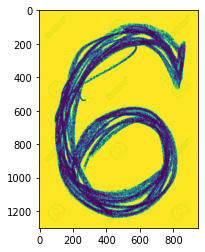

[('8', 51.22129821777344),
 ('6', 45.2534065246582),
 ('0', 1.1290690898895264),
 ('2', 0.8062379360198975),
 ('5', 0.6647528409957886),
 ('4', 0.6409987211227417),
 ('3', 0.126318097114563),
 ('1', 0.07326311618089676),
 ('9', 0.07239286601543427),
 ('7', 0.012260998599231243)]

In [30]:
print("Picture of a 6")
response = requests.get("https://previews.123rf.com/images/aroas/aroas1704/aroas170400034/79321929-handwritten-sketch-black-number-6-on-white-background.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img4 = data_transform(img)
batch4 = torch.unsqueeze(img4,0)
batch4= batch4.cuda()
Answer4 = model(batch4)
_, indices = torch.sort(Answer4,descending = True)
precentage = torch.nn.functional.softmax(Answer4,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 4


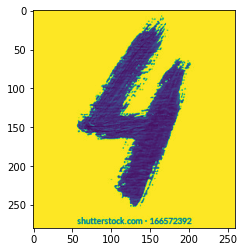

[('4', 37.59752655029297),
 ('8', 30.919864654541016),
 ('2', 20.940305709838867),
 ('1', 9.687767028808594),
 ('5', 0.3599291145801544),
 ('0', 0.35819128155708313),
 ('7', 0.04788665100932121),
 ('3', 0.04567069187760353),
 ('9', 0.03472581505775452),
 ('6', 0.00813317857682705)]

In [31]:
print("Picture of a 4")
response = requests.get("https://image.shutterstock.com/image-illustration/4-black-handwritten-number-on-260nw-166572392.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img5 = data_transform(img)
batch5 = torch.unsqueeze(img5,0)
batch5= batch5.cuda()
Answer5 = model(batch5)
_, indices = torch.sort(Answer5,descending = True)
precentage = torch.nn.functional.softmax(Answer5,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 5


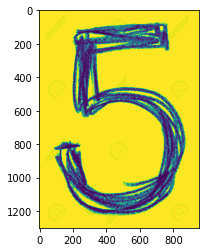

[('8', 84.94577026367188),
 ('5', 9.831896781921387),
 ('3', 3.6752030849456787),
 ('2', 1.420918345451355),
 ('4', 0.0582784004509449),
 ('6', 0.04781109839677811),
 ('1', 0.010402344167232513),
 ('0', 0.006756029091775417),
 ('7', 0.0024982751347124577),
 ('9', 0.0004686747561208904)]

In [32]:
print("Picture of a 5")
response = requests.get("https://previews.123rf.com/images/aroas/aroas1704/aroas170400061/79321951-handwritten-sketch-black-number-5-on-white-background.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img6 = data_transform(img)
batch6 = torch.unsqueeze(img6,0)
batch6= batch6.cuda()
Answer6 = model(batch6)
_, indices = torch.sort(Answer6,descending = True)
precentage = torch.nn.functional.softmax(Answer6,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 2


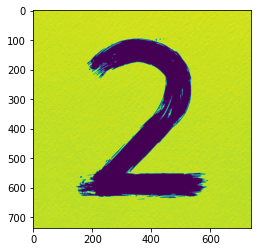

[('8', 95.96647644042969),
 ('2', 3.616119623184204),
 ('3', 0.3299580514431),
 ('4', 0.06369169801473618),
 ('5', 0.010099729523062706),
 ('1', 0.006948808208107948),
 ('6', 0.0028580063953995705),
 ('0', 0.002506067045032978),
 ('9', 0.0012457362608984113),
 ('7', 0.00010171509347856045)]

In [33]:
print("Picture of a 2")
response = requests.get("https://i.pinimg.com/736x/81/63/0f/81630f42397563034acff285b7e7c472.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img7 = data_transform(img)
batch7 = torch.unsqueeze(img7,0)
batch7= batch7.cuda()
Answer7 = model(batch7)
_, indices = torch.sort(Answer7,descending = True)
precentage = torch.nn.functional.softmax(Answer7,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 1


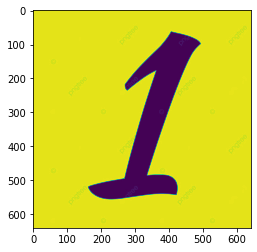

[('1', 60.48325729370117),
 ('4', 22.907390594482422),
 ('8', 10.915739059448242),
 ('7', 1.6583865880966187),
 ('5', 1.6203746795654297),
 ('2', 1.611743450164795),
 ('3', 0.30846530199050903),
 ('0', 0.26223301887512207),
 ('9', 0.19224517047405243),
 ('6', 0.04016019403934479)]

In [34]:
print("Picture of a 1")
response = requests.get("https://png.pngtree.com/png-clipart/20210123/ourlarge/pngtree-black-colorful-number-1-png-image_2786493.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img8 = data_transform(img)
batch8 = torch.unsqueeze(img8,0)
batch8= batch8.cuda()
Answer8 = model(batch8)
_, indices = torch.sort(Answer8,descending = True)
precentage = torch.nn.functional.softmax(Answer8,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 7


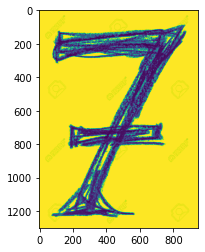

[('8', 94.0694351196289),
 ('4', 2.713862657546997),
 ('2', 2.42383074760437),
 ('1', 0.5342311263084412),
 ('3', 0.15096528828144073),
 ('0', 0.05286568030714989),
 ('5', 0.024644885212183),
 ('9', 0.01766848936676979),
 ('7', 0.008755006827414036),
 ('6', 0.003745550289750099)]

In [35]:
print("Picture of a 7")
response = requests.get("https://previews.123rf.com/images/aroas/aroas1704/aroas170400043/79321936-handwritten-sketch-black-number-7-on-white-background.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img9 = data_transform(img)
batch9 = torch.unsqueeze(img9,0)
batch9= batch9.cuda()
Answer9 = model(batch9)
_, indices = torch.sort(Answer9,descending = True)
precentage = torch.nn.functional.softmax(Answer9,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

Picture of a 9


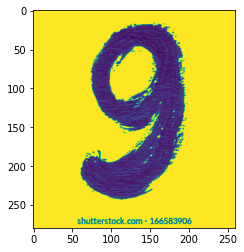

[('8', 96.72118377685547),
 ('2', 3.0884201526641846),
 ('0', 0.07787727564573288),
 ('3', 0.0629483237862587),
 ('5', 0.01827794499695301),
 ('4', 0.009923946112394333),
 ('1', 0.00952726136893034),
 ('6', 0.00632460368797183),
 ('9', 0.005079437047243118),
 ('7', 0.0004364479682408273)]

In [36]:
print("Picture of a 9")
response = requests.get("https://image.shutterstock.com/image-vector/9-black-handwritten-number-on-260nw-166583906.jpg")
img = Image.open(BytesIO(response.content)).convert('L')
img.resize((256,256))
imgplot = plt.imshow(img)
plt.show()
img10 = data_transform(img)
batch10 = torch.unsqueeze(img10,0)
batch10= batch10.cuda()
Answer10 = model(batch10)
_, indices = torch.sort(Answer10,descending = True)
precentage = torch.nn.functional.softmax(Answer10,dim=1)[0]*100
[(classes[idx],precentage[idx].item()) for idx in indices[0][:10]]

In [37]:
def predict_del(model,data):
  y_pred =[]
  y_true =[]
  for i,(images,labels) in enumerate(data):
    images = images.cuda()
    x = model(images)
    value,pred = torch.max(x,1)
    pred = pred.data.cpu()
    y_pred.extend(list(pred.numpy()))
    y_true.extend(list(labels.numpy()))
  return np.array(y_pred), np.array(y_true)

In [38]:
y_pred, y_true = predict_del(model, val_loader)

In [39]:
pd.DataFrame(confusion_matrix(y_true,y_pred,labels = np.arange(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,979,0,0,0,0,0,1,0,0,0
1,0,1134,0,0,0,0,0,1,0,0
2,0,0,1028,0,0,0,0,3,1,0
3,0,0,0,1004,0,4,0,0,0,2
4,0,0,1,0,979,0,0,0,0,2
5,1,0,0,2,0,887,1,0,0,1
6,2,2,0,0,0,1,952,0,1,0
7,0,2,2,0,0,0,0,1024,0,0
8,0,0,0,0,1,0,0,0,972,1
9,0,0,0,0,5,0,0,0,0,1004
